In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

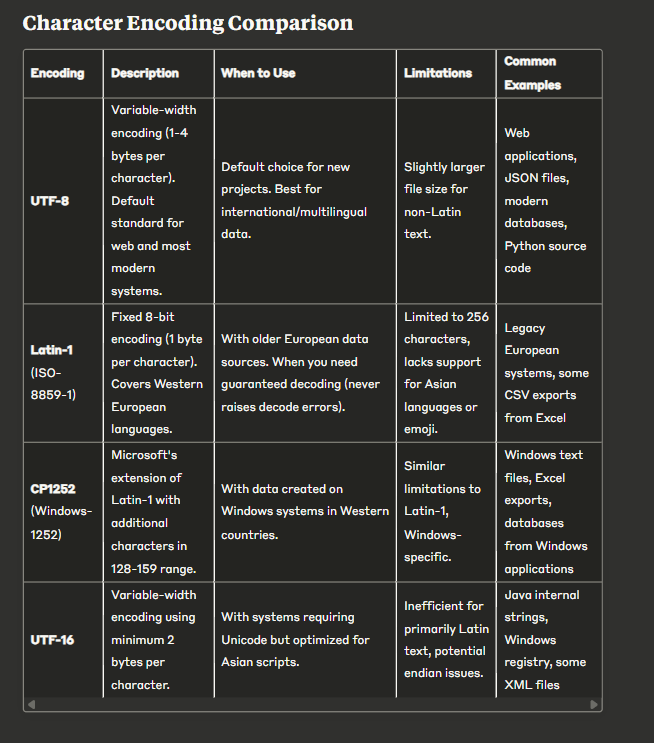


In [2]:
import chardet

with open("QS_2025.csv", 'rb') as f:
    raw_data = f.read(10000)
    
result = chardet.detect(raw_data)
print(f"Detected encoding: {result['encoding']} with confidence {result['confidence']}")

Detected encoding: ISO-8859-1 with confidence 0.73


In [3]:
df = pd.read_csv("QS_2025.csv", encoding='ISO-8859-1')

df.head(5)


,RANK_2025,RANK_2024,Institution_Name,Location,Region,SIZE,FOCUS,RES.,STATUS,Academic_Reputation_Score,...,International_Faculty_Rank,International_Students_Score,International_Students_Rank,International_Research_Network_Score,International_Research_Network_Rank,Employment_Outcomes_Score,Employment_Outcomes_Rank,Sustainability_Score,Sustainability_Rank,Overall_Score
0,1,1,Massachusetts Institute of Technology (MIT),United States,Americas,M,CO,VH,B,100.0,...,100,86.8,143,96.0,58,100.0,8,99.0,15=,100
1,2,6,Imperial College London,United Kingdom,Europe,L,FC,VH,A,98.5,...,66,99.6,44,97.4,34,93.4,61,99.7,6,98.5
2,3,3,University of Oxford,United Kingdom,Europe,L,FC,VH,A,100.0,...,120,97.7,73,100.0,1,100.0,3,85.0,126,96.9
3,4,4,Harvard University,United States,Americas,L,FC,VH,B,100.0,...,269,69.0,215,99.6,5,100.0,1,84.4,130,96.8
4,5,2,University of Cambridge,United Kingdom,Europe,L,FC,VH,A,100.0,...,73,94.8,98,99.3,10,100.0,5,84.8,127=,96.7


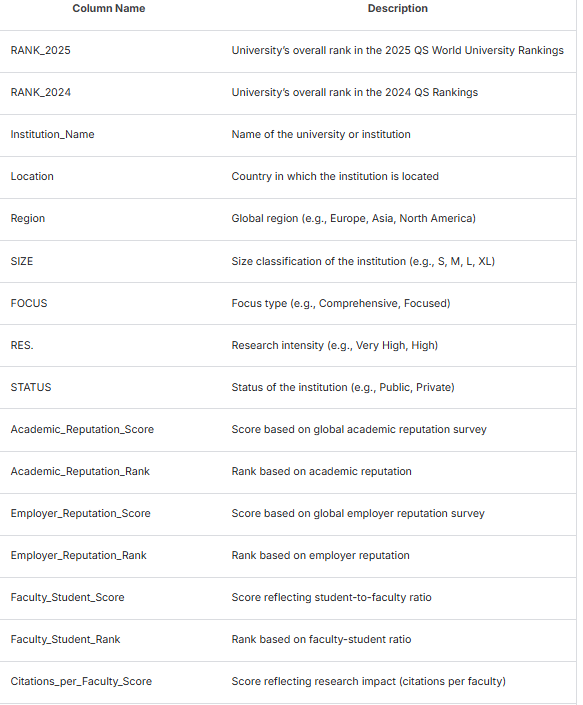

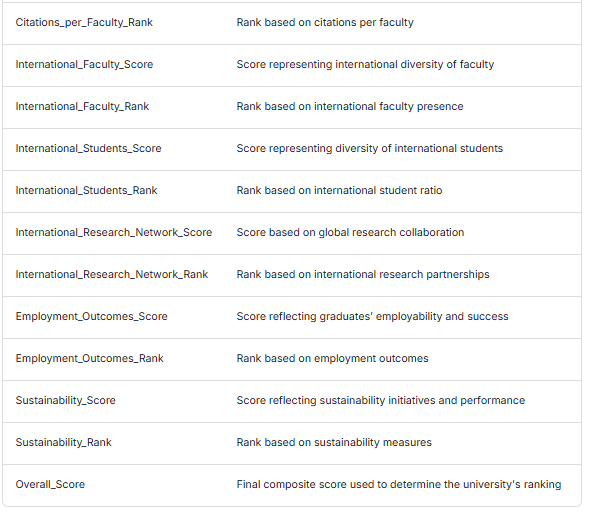


In [4]:
df.describe()

,Academic_Reputation_Score,Employer_Reputation_Score,Faculty_Student_Score,Citations_per_Faculty_Score,International_Faculty_Score,International_Students_Score,International_Research_Network_Score,Employment_Outcomes_Score,Sustainability_Score
count,1503.000000,1503.000000,1503.000000,1503.000000,1403.000000,1445.000000,1502.000000,1503.000000,1484.000000
mean,20.286693,19.787292,28.128676,23.503460,30.736707,25.580346,50.129095,23.825083,24.309299
std,22.326168,23.784738,27.613017,27.870692,34.344365,31.098689,29.866588,27.351315,31.074718
min,1.300000,1.100000,1.000000,1.000000,1.000000,1.000000,1.000000,1.200000,1.000000
25%,6.300000,4.300000,7.300000,2.800000,4.200000,2.900000,22.725000,4.000000,1.300000
50%,11.000000,9.400000,16.000000,9.900000,12.500000,9.600000,51.100000,11.800000,6.750000
75%,23.500000,25.300000,40.400000,36.400000,51.600000,38.300000,77.100000,33.400000,39.500000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [5]:
df.dtypes

RANK_2025                                object
RANK_2024                                object
Institution_Name                         object
Location                                 object
Region                                   object
SIZE                                     object
FOCUS                                    object
RES.                                     object
STATUS                                   object
Academic_Reputation_Score               float64
Academic_Reputation_Rank                 object
Employer_Reputation_Score               float64
Employer_Reputation_Rank                 object
Faculty_Student_Score                   float64
Faculty_Student_Rank                     object
Citations_per_Faculty_Score             float64
Citations_per_Faculty_Rank               object
International_Faculty_Score             float64
International_Faculty_Rank               object
International_Students_Score            float64
International_Students_Rank             

In [6]:
df.isnull().sum()

RANK_2025                                 0
RANK_2024                                21
Institution_Name                          0
Location                                  0
Region                                    0
SIZE                                      0
FOCUS                                     0
RES.                                      0
STATUS                                   37
Academic_Reputation_Score                 0
Academic_Reputation_Rank                  0
Employer_Reputation_Score                 0
Employer_Reputation_Rank                  0
Faculty_Student_Score                     0
Faculty_Student_Rank                      0
Citations_per_Faculty_Score               0
Citations_per_Faculty_Rank                0
International_Faculty_Score             100
International_Faculty_Rank              100
International_Students_Score             58
International_Students_Rank              58
International_Research_Network_Score      1
International_Research_Network_R

In [7]:
print(df.shape)
# assuming that some institutes are new in 2025 and thats why we have missing values in their 2024 ranking. lets just make a new column to show that these are new institutes
df['is_new'] = df['RANK_2024'].isna()
# status is a categorical feature that tells if the institute is public or private etc. lets do mode imputation for this
most_common_status = df['STATUS'].mode()[0] 
df['STATUS'] = df['STATUS'].fillna(most_common_status)

df.isnull().sum()

(1503, 28)


RANK_2025                                 0
RANK_2024                                21
Institution_Name                          0
Location                                  0
Region                                    0
SIZE                                      0
FOCUS                                     0
RES.                                      0
STATUS                                    0
Academic_Reputation_Score                 0
Academic_Reputation_Rank                  0
Employer_Reputation_Score                 0
Employer_Reputation_Rank                  0
Faculty_Student_Score                     0
Faculty_Student_Rank                      0
Citations_per_Faculty_Score               0
Citations_per_Faculty_Rank                0
International_Faculty_Score             100
International_Faculty_Rank              100
International_Students_Score             58
International_Students_Rank              58
International_Research_Network_Score      1
International_Research_Network_R

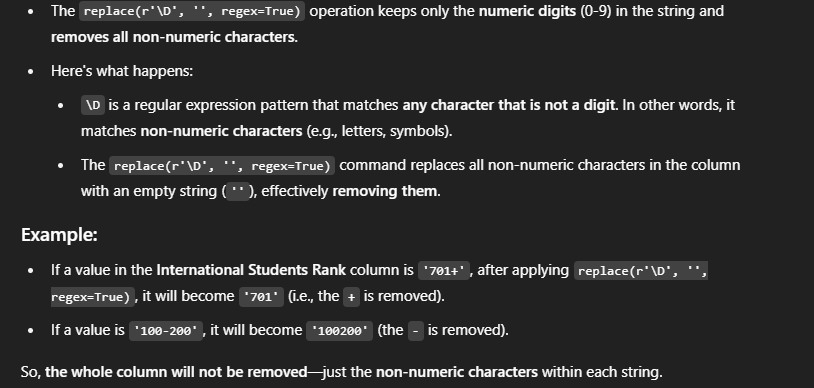


In [8]:
df['International_Research_Network_Score'].nunique()

764

In [9]:
df['International_Research_Network_Rank'].nunique()


701

- We have several rows where we might have scores but don't have ranks and many rows that have the same score. we gotta make sure it assigns to a different rank though, ranks can't overlap
- at score=54.7, the rank=700. anything below 54.7 has rank=701+


In [10]:
# lets try to find those '701+' rows
filtered_df = df[df['International_Research_Network_Score'] < 54.7][['International_Research_Network_Score', 'International_Research_Network_Rank']]
filtered_df.head(10)


,International_Research_Network_Score,International_Research_Network_Rank
46,46.7,701+
52,46.8,701+
97,26.6,701+
117,52.3,701+
123,54.2,701+
201,48.1,701+
204,37.3,701+
206,37.2,701+
209,45.0,701+
210,39.1,701+


In [11]:
# Step: Assign ranks based on the condition
# First, create a mask for scores below 54.7
mask = df['International_Research_Network_Score'] < 54.7

# For rows where the score is less than 54.7, assign ranks starting from 701
df.loc[mask, 'International_Research_Network_Rank'] = df.loc[mask, 'International_Research_Network_Score'].rank(method='first', ascending=False) + 700

# Verify the result
df[['International_Research_Network_Score', 'International_Research_Network_Rank']].head(10)


,International_Research_Network_Score,International_Research_Network_Rank
0,96.0,58
1,97.4,34
2,100.0,1
3,99.6,5
4,99.3,10
5,96.8,45
6,95.7,64
7,91.6,146
8,99.9,2
9,65.5,549


In [12]:
df['International_Research_Network_Rank'].nunique()

1501

In [13]:
filtered_df = df[df['International_Research_Network_Score'] < 5][['International_Research_Network_Score', 'International_Research_Network_Rank']]
filtered_df[filtered_df['International_Research_Network_Rank'] > 0]


,International_Research_Network_Score,International_Research_Network_Rank
434,3.5,1463.0
622,4.5,1446.0
623,4.0,1457.0
629,2.6,1477.0
674,4.1,1455.0
...,...,...
1480,4.8,1444.0
1490,4.5,1448.0
1492,4.5,1449.0
1496,3.4,1468.0


In [16]:
df['International_Faculty_Rank'].nunique()

680

In [17]:
df['International_Faculty_Score'].nunique()


531

In [27]:
filtered_df = df[df["International_Faculty_Score"] < 13][['International_Faculty_Score', 'International_Faculty_Rank']]

filtered_df.head(20)

,International_Faculty_Score,International_Faculty_Rank
21,9.6,701+
30,10.5,701+
32,10.1,701+
65,6.1,701+
75,11.0,701+
91,6.8,701+
94,7.5,701+
117,4.3,701+
131,3.1,701+
134,11.6,701+
